<a href="https://colab.research.google.com/github/Ahalya24/Ahalya24.github.io/blob/master/Elmo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

size of X: (34, 1024)
size of reduced X: (34, 2)
Variance retained ratio of PCA-1: 0.1482318937778473
Variance retained ratio of PCA-2: 0.0978442057967186
fruit_elmo_layer_1.png saved

size of X: (34, 1024)
size of reduced X: (34, 2)
Variance retained ratio of PCA-1: 0.13862450420856476
Variance retained ratio of PCA-2: 0.10915057361125946
fruit_elmo_layer_2.png saved



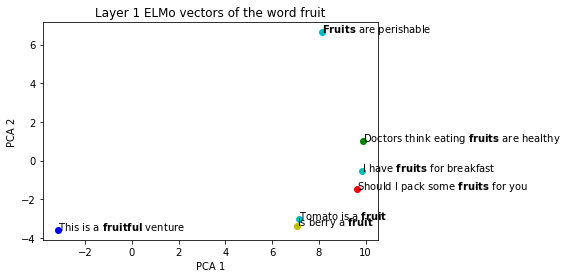

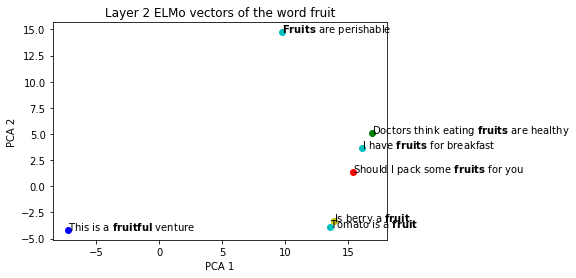

In [24]:
import numpy as np
from allennlp.commands.elmo import ElmoEmbedder
from sklearn.decomposition import PCA


class Elmo:
    def __init__(self):
        self.elmo = ElmoEmbedder()

    def get_elmo_vector(self, tokens, layer):
        vectors = self.elmo.embed_sentence(tokens)
        X = []
        for vector in vectors[layer]:
            X.append(vector)

        X = np.array(X)

        return X


def dim_reduction(X, n):
    pca = PCA(n_components=n)
    print("size of X: {}".format(X.shape))
    results = pca.fit_transform(X)
    print("size of reduced X: {}".format(results.shape))

    for i, ratio in enumerate(pca.explained_variance_ratio_):
        print("Variance retained ratio of PCA-{}: {}".format(i+1, ratio))

    return results


def plot(word, token_list, reduced_X, file_name, title):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()

    # plot ELMo vectors
    i = 0
    for j, token in enumerate(token_list):
        color = pick_color(j)
        for _, w in enumerate(token):

            # only plot the word of interest
            if w.lower() in [word, word + 's', word + 'ful']:
                ax.plot(reduced_X[i, 0], reduced_X[i, 1], color)
            i += 1

    tokens = []
    for token in token_list:
        tokens += token

    # annotate point
    k = 0
    for i, token in enumerate(tokens):
        if token.lower() in [word, word + 's', word + 'ful']:
            text = ' '.join(token_list[k])

            # bold the word of interest in the sentence
            text = text.replace(token, r"$\bf{" + token + "}$")

            plt.annotate(text, xy=(reduced_X[i, 0], reduced_X[i, 1]))
            k += 1

    ax.set_title(title)
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    fig.savefig(file_name, bbox_inches="tight")

    print("{} saved\n".format(file_name))


def pick_color(i):
    if i == 0:
        color = 'ro'
    elif i == 1:
        color = 'bo'
    elif i == 2:
        color = 'yo'
    elif i == 3:
        color = 'go'
    else:
        color = 'co'
    return color


if __name__ == "__main__":
    model = Elmo()

    fruit = OrderedDict()
    fruit[0] = "Should I pack some fruits for you"
    fruit[1] = "This is a fruitful venture"
    fruit[2] = "Is berry a fruit"
    fruit[3] = "Doctors think eating fruits are healthy"
    fruit[4] = "I have fruits for breakfast"
    fruit[5] = "Fruits are perishable"
    fruit[6] = "Tomato is a fruit"

    


    words = {
        "fruit": fruit
    }

    # contextual vectors for ELMo layer 1 and 2
    for layer in [1,2]:
        for word, sentences in words.items():
            X = np.concatenate([model.get_elmo_vector(tokens=sentences[idx].split(),
                                                      layer=layer)
                                for idx, _ in enumerate(sentences)], axis=0)

            # The first 2 principal components
            X_reduce = dim_reduction(X=X, n=2)

            token_list = []
            for _, sentence in sentences.items():
                token_list.append(sentence.split())

            file_name = "{}_elmo_layer_{}.png".format(word, layer)
            title = "Layer {} ELMo vectors of the word {}".format(layer, word)
            plot(word, token_list, X_reduce, file_name, title)
